In [1]:
import vectorbt as vbt

In [2]:
import numpy as np
import pandas as pd

## decorators.py

In [3]:
from vectorbt.decorators import *

class Y:
    z = 3
class X:
    y = Y()
x = X()
x.y.z

3

In [4]:
@required('a')
@required('b')
@required('x.y.z')
def h(a, b=np.array([1, 2]), x=x):
    return a, b

h(np.array([1, 2]))

(array([1, 2]), array([1, 2]))

In [5]:
@has_type('a', np.ndarray)
@has_type('b', np.ndarray)
@has_type('x.y.z', int)
def h(a, b=np.asarray([3, 4]), x=x):
    return a, b

h(np.array([1, 2]))

(array([1, 2]), array([3, 4]))

In [6]:
@to_type('a', pd.Series)
@to_type('b', pd.DataFrame)
def h(a, b=np.asarray([3, 4])):
    return a, b

h(np.array([1, 2]))

(0    1
 1    2
 dtype: int64,    0
 0  3
 1  4)

In [7]:
@has_dtype('a', np.int64)
@has_dtype('b', np.int64)
def h(a, b=np.asarray([3, 4])):
    return a, b

h(np.array([1, 2]))

(array([1, 2]), array([3, 4]))

In [8]:
@to_dtype('a', np.float64)
@to_dtype('b', np.float64)
def h(a, b=np.asarray([3, 4])):
    return a, b

h(np.array([1, 2]))

(array([1., 2.]), array([3., 4.]))

In [9]:
@have_same_shape('a', 'b')
@have_same_shape('a', 'd', along_axis=0)
@have_same_shape('c', 'd', along_axis=(0, 1))
def h(a, b, c, d):
    return a, b

h(np.array([1, 2]), np.array([3, 4]), np.array([[5, 6]]), np.array([[7], [8]]))

(array([1, 2]), array([3, 4]))

In [10]:
@to_1d('a')
@to_1d('b')
def h(a, b=[1]):
    return a, b

h(0)

(array([0]), array([1]))

In [11]:
@to_2d('a')
@to_2d('b')
def h(a, b=[1]):
    return a, b

h(np.asarray([[0]]))

(array([[0]]), array([[1]]))

In [12]:
@broadcast('a', 'b', 'c', 'd')
def h(a, b, c, d=[[0, 1, 2]]):
    return a, b, c, d

h(0, [[1], [2], [3]], np.empty((3, 3)))

(array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]), array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]]), array([[ 2.68156159e+154, -1.49457459e-154,  2.47032823e-323],
        [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        [ 2.68156159e+154,  2.32035409e+077,  1.58794087e-047]]), array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]))

In [13]:
@broadcast_to_combs_of('a', 'b')
def h(a, b=[[0, 1], [2, 3]]):
    return a, b

h([-1, -2])

(array([[[-1, -1],
         [-1, -1]],
 
        [[-2, -2],
         [-2, -2]]]), [[0, 1], [2, 3]])

In [14]:
def a_nb(self): return self

@add_2d_nb_methods(a_nb)
class H(np.ndarray):
    def __new__(cls, a):
        return np.asarray(a).view(cls)

H([1, 2]).a()

H([[1],
   [2]])

In [15]:
class G():
    @cached_property
    def cache_me(self): return np.random.uniform(size=(10000, 10000))
    
g = G()

In [16]:
%time _ = g.cache_me

CPU times: user 1.38 s, sys: 234 ms, total: 1.61 s
Wall time: 1.62 s


In [17]:
%time _ = g.cache_me

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 9.78 µs


## ohlcv.py

In [18]:
ohlcv = vbt.OHLCV(
    vbt.TimeSeries(np.asarray([2., 3., 4., 5., 6.])),
    vbt.TimeSeries(np.asarray([7., 6., 5., 6., 7.])),
    vbt.TimeSeries(np.asarray([1., 2., 3., 2., 1.])),
    vbt.TimeSeries(np.asarray([6., 5., 4., 3., 2.])),
    volume=vbt.TimeSeries(np.asarray([1., 2., 3., 4., 5]))
)

In [19]:
ohlcv.plot()

FigureWidget({
    'data': [{'close': array([6., 5., 4., 3., 2.]),
              'high': array([7., 6., 5., 6.…

In [20]:
vbt.OHLCV.from_df(pd.DataFrame({'Open': [1], 'High': [2], 'Low': [3], 'Close': [4]})).plot()

FigureWidget({
    'data': [{'close': array([4.]),
              'high': array([2.]),
              'low': arr…

## timeseries.py

In [21]:
ts = vbt.TimeSeries(pd.DataFrame({
    'a': [1, 2, 3, 4, np.nan], 
    'b': [np.nan, 4, 3, 2, 1],
    'c': [1, 2, 3, 2, 1]}))
ts

TimeSeries([[ 1., nan,  1.],
            [ 2.,  4.,  2.],
            [ 3.,  3.,  3.],
            [ 4.,  2.,  2.],
            [nan,  1.,  1.]])

In [22]:
vbt.TimeSeries.from_rolling_window(ts[:, 0], 3)

TimeSeries([[ 1.,  2.,  3.],
            [ 2.,  3.,  4.],
            [ 3.,  4., nan]])

In [23]:
ts.set_by_mask(np.isnan(ts), -1)

TimeSeries([[ 1., -1.,  1.],
            [ 2.,  4.,  2.],
            [ 3.,  3.,  3.],
            [ 4.,  2.,  2.],
            [-1.,  1.,  1.]])

In [24]:
ts.fillna(-1)

TimeSeries([[ 1., -1.,  1.],
            [ 2.,  4.,  2.],
            [ 3.,  3.,  3.],
            [ 4.,  2.,  2.],
            [-1.,  1.,  1.]])

In [25]:
ts.prepend(3, np.nan)

TimeSeries([[nan, nan, nan],
            [nan, nan, nan],
            [nan, nan, nan],
            [ 1., nan,  1.],
            [ 2.,  4.,  2.],
            [ 3.,  3.,  3.],
            [ 4.,  2.,  2.],
            [nan,  1.,  1.]])

In [26]:
ts.fshift(3)

TimeSeries([[nan, nan, nan],
            [nan, nan, nan],
            [nan, nan, nan],
            [ 1., nan,  1.],
            [ 2.,  4.,  2.]])

In [27]:
ts.diff()

TimeSeries([[nan, nan, nan],
            [ 1., nan,  1.],
            [ 1., -1.,  1.],
            [ 1., -1., -1.],
            [nan, -1., -1.]])

In [28]:
pd.DataFrame(ts).diff()

,0,1,2
0,NaN,NaN,NaN
1,1.0,NaN,1.0
2,1.0,-1.0,1.0
3,1.0,-1.0,-1.0
4,NaN,-1.0,-1.0


In [29]:
ts.pct_change()

TimeSeries([[        nan,         nan,         nan],
            [ 1.        ,         nan,  1.        ],
            [ 0.5       , -0.25      ,  0.5       ],
            [ 0.33333333, -0.33333333, -0.33333333],
            [        nan, -0.5       , -0.5       ]])

In [30]:
pd.DataFrame(ts).pct_change()

,0,1,2
0,NaN,NaN,NaN
1,1.000000,NaN,1.000000
2,0.500000,-0.250000,0.500000
3,0.333333,-0.333333,-0.333333
4,0.000000,-0.500000,-0.500000


In [31]:
ts.ffill()

TimeSeries([[ 1., nan,  1.],
            [ 2.,  4.,  2.],
            [ 3.,  3.,  3.],
            [ 4.,  2.,  2.],
            [ 4.,  1.,  1.]])

In [32]:
pd.DataFrame(ts).ffill()

,0,1,2
0,1.0,NaN,1.0
1,2.0,4.0,2.0
2,3.0,3.0,3.0
3,4.0,2.0,2.0
4,4.0,1.0,1.0


In [33]:
ts.cumsum()

TimeSeries([[ 1., nan,  1.],
            [ 3.,  4.,  3.],
            [ 6.,  7.,  6.],
            [10.,  9.,  8.],
            [nan, 10.,  9.]])

In [34]:
pd.DataFrame(ts).cumsum()

,0,1,2
0,1.0,NaN,1.0
1,3.0,4.0,3.0
2,6.0,7.0,6.0
3,10.0,9.0,8.0
4,NaN,10.0,9.0


In [35]:
ts.cumprod()

TimeSeries([[ 1., nan,  1.],
            [ 2.,  4.,  2.],
            [ 6., 12.,  6.],
            [24., 24., 12.],
            [nan, 24., 12.]])

In [36]:
pd.DataFrame(ts).cumprod()

,0,1,2
0,1.0,NaN,1.0
1,2.0,4.0,2.0
2,6.0,12.0,6.0
3,24.0,24.0,12.0
4,NaN,24.0,12.0


In [37]:
ts.rolling_mean(3)

TimeSeries([[1.        ,        nan, 1.        ],
            [1.5       , 4.        , 1.5       ],
            [2.        , 3.5       , 2.        ],
            [3.        , 3.        , 2.33333333],
            [3.5       , 2.        , 2.        ]])

In [38]:
pd.DataFrame(ts).rolling(window=3, min_periods=1).mean()

,0,1,2
0,1.0,NaN,1.000000
1,1.5,4.0,1.500000
2,2.0,3.5,2.000000
3,3.0,3.0,2.333333
4,3.5,2.0,2.000000


In [39]:
ts.rolling_std(3)

TimeSeries([[0.        ,        nan, 0.        ],
            [0.5       , 0.        , 0.5       ],
            [0.81649658, 0.5       , 0.81649658],
            [0.81649658, 0.81649658, 0.47140452],
            [0.5       , 0.81649658, 0.81649658]])

In [40]:
pd.DataFrame(ts).rolling(window=3, min_periods=1).std(ddof=0)

,0,1,2
0,0.000000,NaN,0.000000
1,0.500000,0.000000,0.500000
2,0.816497,0.500000,0.816497
3,0.816497,0.816497,0.471405
4,0.500000,0.816497,0.816497


In [41]:
ts.expanding_max()

TimeSeries([[ 1., nan,  1.],
            [ 2.,  4.,  2.],
            [ 3.,  4.,  3.],
            [ 4.,  4.,  3.],
            [ 4.,  4.,  3.]])

In [42]:
pd.DataFrame(ts).rolling(window=ts.shape[0], min_periods=1).max()

,0,1,2
0,1.0,NaN,1.0
1,2.0,4.0,2.0
2,3.0,4.0,3.0
3,4.0,4.0,3.0
4,4.0,4.0,3.0


In [43]:
ts.ewm_mean(2)

TimeSeries([[1.        ,        nan, 1.        ],
            [1.75      , 4.        , 1.75      ],
            [2.61538462, 3.25      , 2.61538462],
            [3.55      , 2.38461538, 2.2       ],
            [3.55      , 1.45      , 1.39669421]])

In [44]:
pd.DataFrame(ts).ewm(span=2).mean()

,0,1,2
0,1.000000,NaN,1.000000
1,1.750000,4.000000,1.750000
2,2.615385,3.250000,2.615385
3,3.550000,2.384615,2.200000
4,3.550000,1.450000,1.396694


In [45]:
ts.ewm_std(2)

TimeSeries([[       nan,        nan,        nan],
            [0.70710678,        nan, 0.70710678],
            [0.91986621, 0.70710678, 0.91986621],
            [1.05975324, 0.91986621, 0.65633012],
            [1.05975324, 1.05975324, 0.88467205]])

In [46]:
pd.DataFrame(ts).ewm(span=2).std(ddof=0)

,0,1,2
0,NaN,NaN,NaN
1,0.707107,NaN,0.707107
2,0.919866,0.707107,0.919866
3,1.059753,0.919866,0.656330
4,1.059753,1.059753,0.884672


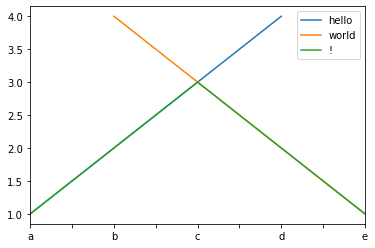

In [47]:
# Two ways of plotting
pd.DataFrame(ts, index=['a', 'b', 'c', 'd', 'e'], columns=['hello', 'world', '!']).plot()

In [48]:
fig = ts.plot(column=0, label='hello')
vbt.TimeSeries(np.full_like(ts, 2.5)).plot(column=0, label='world', fig=fig)

FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'hello',
              'type': 'scatter',
…

## signals.py

In [49]:
vbt.Signals.falses((5, 3))

Signals([[False, False, False],
         [False, False, False],
         [False, False, False],
         [False, False, False],
         [False, False, False]])

In [50]:
entries = vbt.Signals.generate_random_entries((5, 3), 2, every_nth=2, seed=42)
entries

Signals([[ True,  True,  True],
         [False, False, False],
         [False,  True, False],
         [False, False, False],
         [ True, False,  True]])

In [51]:
vbt.Signals.generate_random_exits(entries)

Signals([[False, False, False],
         [ True,  True, False],
         [False, False, False],
         [False,  True,  True],
         [False, False, False]])

In [52]:
entries.generate_random_exits()

Signals([[False, False, False],
         [False,  True, False],
         [ True, False, False],
         [False,  True,  True],
         [False, False, False]])

In [53]:
from numba import njit, b1

@njit
def exit_func_nb(entries, col_idx, prev_idx, next_idx):
    # First value after entry
    entries = entries[:, col_idx]
    a = np.full(entries.shape, False, dtype=b1)
    a[prev_idx+1:next_idx] = True
    return a

entries.generate_exits(exit_func_nb)

Signals([[False, False, False],
         [ True,  True,  True],
         [False, False, False],
         [False,  True, False],
         [False, False, False]])

In [54]:
entries.generate_exits(exit_func_nb, only_first=False)

Signals([[False, False, False],
         [ True,  True,  True],
         [ True, False,  True],
         [ True,  True,  True],
         [False,  True, False]])

In [55]:
stops = np.asarray([np.full(ts.shape, 0.1), np.full(ts.shape, 0.2)])
stops

array([[[0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1]],

       [[0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2]]])

In [56]:
print(entries.generate_stoploss_exits(ts, 0.1).shape)
print(entries.generate_stoploss_exits(ts, [0.1, 0.2]).shape)
print(entries.generate_stoploss_exits(ts, stops).shape)
print(entries.generate_stoploss_exits(ts[:, 0], stops).shape)
print(entries[:, 0].generate_stoploss_exits(ts, stops).shape)
print(entries[:, 0].generate_stoploss_exits(ts[:, 0], stops).shape)

(5, 3)
(5, 6)
(5, 6)
(5, 6)
(5, 6)
(5, 2)


In [57]:
entries.generate_stoploss_exits(ts, 0.1)

Signals([[False, False, False],
         [False, False, False],
         [False, False, False],
         [False,  True, False],
         [False, False, False]])

In [58]:
print(entries.generate_trailstop_exits(ts, 0.1).shape)
print(entries.generate_trailstop_exits(ts, [0.1, 0.2]).shape)
print(entries.generate_trailstop_exits(ts, stops).shape)
print(entries.generate_trailstop_exits(ts[:, 0], stops).shape)
print(entries[:, 0].generate_trailstop_exits(ts, stops).shape)
print(entries[:, 0].generate_trailstop_exits(ts[:, 0], stops).shape)

(5, 3)
(5, 6)
(5, 6)
(5, 6)
(5, 6)
(5, 2)


In [59]:
entries.generate_trailstop_exits(ts, 0.1)

Signals([[False, False, False],
         [False, False, False],
         [False, False, False],
         [False,  True,  True],
         [False, False, False]])

In [60]:
a = np.random.randint(-1, 2, size=(5, 3))
a

array([[ 0,  0,  1],
       [ 1,  1, -1],
       [ 0, -1,  1],
       [ 0, -1,  0],
       [ 1, -1,  1]])

In [61]:
@njit
def entry_func_nb(exits, col_idx, prev_idx, next_idx, a):
    # First value after last entry
    exits = exits[:, col_idx]
    a = a[:, col_idx]
    entries = np.full(exits.shape, False, dtype=b1)
    entries[a == 1] = True
    return entries

@njit
def exit_func_nb(entries, col_idx, prev_idx, next_idx, a):
    # First value after last exit
    entries = entries[:, col_idx]
    a = a[:, col_idx]
    exits = np.full(entries.shape, False, dtype=b1)
    exits[a == -1] = True
    return exits

vbt.Signals.generate_entries_and_exits(a.shape, entry_func_nb, exit_func_nb, a)

(Signals([[False, False,  True],
          [ True,  True, False],
          [False, False,  True],
          [False, False, False],
          [False, False, False]]), Signals([[False, False, False],
          [False, False,  True],
          [False,  True, False],
          [False, False, False],
          [False, False, False]]))

In [62]:
entries = vbt.Signals.generate_random_entries((10, 3), 5, seed=43)
entries

Signals([[ True,  True,  True],
         [ True, False, False],
         [ True, False,  True],
         [False,  True,  True],
         [ True,  True, False],
         [False, False, False],
         [False,  True,  True],
         [False,  True, False],
         [False, False,  True],
         [ True, False, False]])

In [63]:
entries.shuffle(seed=42)

Signals([[False,  True, False],
         [ True, False,  True],
         [False, False,  True],
         [ True, False,  True],
         [False,  True,  True],
         [ True,  True, False],
         [ True,  True,  True],
         [ True, False, False],
         [False,  True, False],
         [False, False, False]])

In [64]:
entries.prepend(2, False)

Signals([[False, False, False],
         [False, False, False],
         [ True,  True,  True],
         [ True, False, False],
         [ True, False,  True],
         [False,  True,  True],
         [ True,  True, False],
         [False, False, False],
         [False,  True,  True],
         [False,  True, False],
         [False, False,  True],
         [ True, False, False]])

In [65]:
entries.fshift(2)

Signals([[False, False, False],
         [False, False, False],
         [ True,  True,  True],
         [ True, False, False],
         [ True, False,  True],
         [False,  True,  True],
         [ True,  True, False],
         [False, False, False],
         [False,  True,  True],
         [False,  True, False]])

In [66]:
entries.first_true()

Signals([[ True,  True,  True],
         [False, False, False],
         [False, False,  True],
         [False,  True, False],
         [ True, False, False],
         [False, False, False],
         [False,  True,  True],
         [False, False, False],
         [False, False,  True],
         [ True, False, False]])

In [67]:
entries.first_true(after_false=True)

Signals([[False, False, False],
         [False, False, False],
         [False, False,  True],
         [False,  True, False],
         [ True, False, False],
         [False, False, False],
         [False,  True,  True],
         [False, False, False],
         [False, False,  True],
         [ True, False, False]])

In [68]:
entries.first_false()

Signals([[False, False, False],
         [False,  True,  True],
         [False, False, False],
         [ True, False, False],
         [False, False,  True],
         [ True,  True, False],
         [False, False, False],
         [False, False,  True],
         [False,  True, False],
         [False, False,  True]])

In [69]:
entries.first_false(after_true=True)

Signals([[False, False, False],
         [False,  True,  True],
         [False, False, False],
         [ True, False, False],
         [False, False,  True],
         [ True,  True, False],
         [False, False, False],
         [False, False,  True],
         [False,  True, False],
         [False, False,  True]])

In [70]:
entries.nst_true(2)

Signals([[False, False, False],
         [ True, False, False],
         [False, False, False],
         [False, False,  True],
         [False,  True, False],
         [False, False, False],
         [False, False, False],
         [False,  True, False],
         [False, False, False],
         [False, False, False]])

In [71]:
entries.nst_false(2)

Signals([[False, False, False],
         [False, False, False],
         [False,  True, False],
         [False, False, False],
         [False, False, False],
         [False, False,  True],
         [ True, False, False],
         [False, False, False],
         [False, False, False],
         [False,  True, False]])

In [72]:
entries.from_nst_true(2)

Signals([[False, False, False],
         [ True, False, False],
         [ True, False, False],
         [False, False,  True],
         [False,  True, False],
         [False, False, False],
         [False, False, False],
         [False,  True, False],
         [False, False, False],
         [False, False, False]])

In [73]:
entries.from_nst_false(2)

Signals([[False, False, False],
         [False, False, False],
         [False,  True, False],
         [False, False, False],
         [False, False, False],
         [False, False,  True],
         [ True, False, False],
         [ True, False, False],
         [ True, False, False],
         [False,  True, False]])

In [74]:
entries.plot(column=0)

FigureWidget({
    'data': [{'customdata': array([True, True, True, False, True, False, False, False, False, T…

## strategy.py

In [75]:
print(vbt.DMAC(ts, 2, 3).fast.shape)
print(vbt.DMAC(ts, [2, 3], 4).fast.shape)
print(vbt.DMAC(ts, 2, [3, 4]).fast.shape)
print(vbt.DMAC(ts, [2, 3], [4, 5]).fast.shape)

(5, 3)
(5, 6)
(5, 6)
(5, 6)


In [76]:
dmac = vbt.DMAC(ts, 1, 2)

dmac.fast, dmac.slow

(TimeSeries([[nan, nan, nan],
             [ 2.,  4.,  2.],
             [ 3.,  3.,  3.],
             [ 4.,  2.,  2.],
             [nan,  1.,  1.]]), TimeSeries([[nan, nan, nan],
             [nan, nan, nan],
             [2.5, 3.5, 2.5],
             [3.5, 2.5, 2.5],
             [4. , 1.5, 1.5]]))

In [77]:
dmac.is_fast_above_slow(), dmac.is_fast_below_slow()

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/strategy.py:85: RuntimeWarning:

invalid value encountered in greater

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/strategy.py:88: RuntimeWarning:

invalid value encountered in less



(Signals([[False, False, False],
          [False, False, False],
          [ True, False,  True],
          [ True, False, False],
          [False, False, False]]), Signals([[False, False, False],
          [False, False, False],
          [False,  True, False],
          [False,  True,  True],
          [False,  True,  True]]))

In [78]:
vbt.DMAC(ts, np.asarray([1, 2]), np.asarray([3, 4])).fast

TimeSeries([[nan, nan, nan, nan, nan, nan],
            [2. , 4. , 2. , nan, nan, nan],
            [3. , 3. , 3. , 2.5, 3.5, 2.5],
            [4. , 2. , 2. , 3.5, 2.5, 2.5],
            [nan, 1. , 1. , 4. , 1.5, 1.5]])

In [79]:
bb = vbt.BollingerBands(ts, 2, 1)

bb.upper, bb.middle, bb.lower

(TimeSeries([[nan, nan, nan],
             [nan, nan, nan],
             [ 3.,  4.,  3.],
             [ 4.,  3.,  3.],
             [ 4.,  2.,  2.]]), TimeSeries([[nan, nan, nan],
             [nan, nan, nan],
             [2.5, 3.5, 2.5],
             [3.5, 2.5, 2.5],
             [4. , 1.5, 1.5]]), TimeSeries([[nan, nan, nan],
             [nan, nan, nan],
             [ 2.,  3.,  2.],
             [ 3.,  2.,  2.],
             [ 4.,  1.,  1.]]))

In [80]:
print(vbt.BollingerBands(ts, 2, 1).upper.shape)
print(vbt.BollingerBands(ts, [2, 3], 1).upper.shape)
print(vbt.BollingerBands(ts, 2, [1, 2]).upper.shape)
print(vbt.BollingerBands(ts, [2, 3], [1, 2]).upper.shape)

(5, 3)
(5, 6)
(5, 6)
(5, 6)


In [81]:
bb.percent_b, bb.bandwidth

(TimeSeries([[nan, nan, nan],
             [nan, nan, nan],
             [ 1.,  0.,  1.],
             [ 1.,  0.,  0.],
             [nan,  0.,  0.]]),
 TimeSeries([[       nan,        nan,        nan],
             [       nan,        nan,        nan],
             [0.4       , 0.28571429, 0.4       ],
             [0.28571429, 0.4       , 0.4       ],
             [0.        , 0.66666667, 0.66666667]]))

In [82]:
bb.is_percent_b_above(0.5)

Signals([[False, False, False],
         [False, False, False],
         [ True, False,  True],
         [ True, False, False],
         [False, False, False]])

In [83]:
print(bb.is_percent_b_above(0.5).shape) # threshold per matrix
print(bb.is_percent_b_above([[0.1], [0.2], [0.3], [0.4], [0.5]]).shape) # threshold per index
print(bb.is_percent_b_above([0.5, 0.6]).shape) # threshold per column
print(bb.is_percent_b_above(stops).shape) # threshold per element

(5, 3)
(5, 3)
(5, 6)
(5, 6)


In [84]:
print(vbt.RSI(ts, 2).rsi.shape)
print(vbt.RSI(ts, [2, 3]).rsi.shape)

(5, 3)
(5, 6)


In [85]:
rsi = vbt.RSI(ts, 2)

rsi.rsi

TimeSeries([[ nan,  nan,  nan],
            [ nan,  nan,  nan],
            [100.,   0., 100.],
            [100.,   0.,  50.],
            [100.,   0.,   0.]])

In [86]:
rsi.is_rsi_above([70, 100])

Signals([[False, False, False, False, False, False],
         [False, False, False, False, False, False],
         [ True, False,  True, False, False, False],
         [ True, False, False, False, False, False],
         [ True, False, False, False, False, False]])

In [87]:
print(rsi.is_rsi_above(0.5).shape)
print(rsi.is_rsi_above([[0.1], [0.2], [0.3], [0.4], [0.5]]).shape)
print(rsi.is_rsi_above([0.5, 0.6]).shape)
print(rsi.is_rsi_above(stops).shape)

(5, 3)
(5, 3)
(5, 6)
(5, 6)


## portfolio.py

In [88]:
ts = vbt.TimeSeries(np.asarray([
    [1, 9, 1, 5],
    [2, 8, 2, 4],
    [3, 7, 3, 3],
    [4, 6, 4, 2],
    [5, 5, 5, 1],
    [6, 4, 4, 2],
    [7, 3, 3, 3],
    [8, 2, 2, 4],
    [9, 1, 1, 5]
], dtype=np.float64))
ts

TimeSeries([[1., 9., 1., 5.],
            [2., 8., 2., 4.],
            [3., 7., 3., 3.],
            [4., 6., 4., 2.],
            [5., 5., 5., 1.],
            [6., 4., 4., 2.],
            [7., 3., 3., 3.],
            [8., 2., 2., 4.],
            [9., 1., 1., 5.]])

In [89]:
from datetime import datetime

index = pd.Index([
    datetime(2020, 1, 1),
    datetime(2020, 1, 2),
    datetime(2020, 1, 3),
    datetime(2020, 1, 4),
    datetime(2020, 1, 5),
    datetime(2020, 1, 6),
    datetime(2020, 1, 7),
    datetime(2020, 1, 8),
    datetime(2020, 1, 9)
])

In [90]:
entries = vbt.Signals(np.asarray([
    [False, False, False, False],
    [True, True, True, True],
    [False, False, False, False],
    [False, False, False, False],
    [True, True, True, True],
    [False, False, False, False],
    [False, False, False, False],
    [True, True, True, True],
    [False, False, False, False],
]))
entries

Signals([[False, False, False, False],
         [ True,  True,  True,  True],
         [False, False, False, False],
         [False, False, False, False],
         [ True,  True,  True,  True],
         [False, False, False, False],
         [False, False, False, False],
         [ True,  True,  True,  True],
         [False, False, False, False]])

In [91]:
exits = entries.fshift(2)
exits

Signals([[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False],
         [ True,  True,  True,  True],
         [False, False, False, False],
         [False, False, False, False],
         [ True,  True,  True,  True],
         [False, False, False, False],
         [False, False, False, False]])

In [92]:
portfolio = vbt.Portfolio.from_signals(ts, entries, exits, investment=100)

portfolio.trades, portfolio.shares, portfolio.cash, portfolio.equity

(TradeSeries([[  nan,   nan,   nan,   nan],
              [ 50. ,  12.5,  50. ,  25. ],
              [  nan,   nan,   nan,   nan],
              [-50. , -12.5, -50. , -25. ],
              [ 40. ,  15. ,  40. ,  50. ],
              [  nan,   nan,   nan,   nan],
              [-40. , -15. , -40. , -50. ],
              [ 35. ,  22.5,  60. ,  37.5],
              [  nan,   nan,   nan,   nan]]),
 TimeSeries([[ 0. ,  0. ,  0. ,  0. ],
             [50. , 12.5, 50. , 25. ],
             [50. , 12.5, 50. , 25. ],
             [ 0. ,  0. ,  0. ,  0. ],
             [40. , 15. , 40. , 50. ],
             [40. , 15. , 40. , 50. ],
             [ 0. ,  0. ,  0. ,  0. ],
             [35. , 22.5, 60. , 37.5],
             [35. , 22.5, 60. , 37.5]]),
 TimeSeries([[100., 100., 100., 100.],
             [  0.,   0.,   0.,   0.],
             [  0.,   0.,   0.,   0.],
             [200.,  75., 200.,  50.],
             [  0.,   0.,   0.,   0.],
             [  0.,   0.,   0.,   0.],
             [2

In [93]:
print(vbt.Portfolio.from_signals(ts, entries[:, 0], exits).trades.shape)
print(vbt.Portfolio.from_signals(ts, entries[:, 0], exits[:, 0]).trades.shape)
print(vbt.Portfolio.from_signals(ts[:, 0], entries[:, 0], exits[:, 0]).trades.shape)
print(vbt.Portfolio.from_signals(ts[:, 0], entries[:, 0], exits[:, 0], volume=[1, 2, 3]).trades.shape)

(9, 4)
(9, 4)
(9, 1)
(9, 3)


In [94]:
ord_portfolio = vbt.Portfolio.from_orders(ts, np.full_like(ts, 1), investment=100)

ord_portfolio.trades, ord_portfolio.shares, ord_portfolio.cash, ord_portfolio.equity

(TradeSeries([[1., 1., 1., 1.],
              [1., 1., 1., 1.],
              [1., 1., 1., 1.],
              [1., 1., 1., 1.],
              [1., 1., 1., 1.],
              [1., 1., 1., 1.],
              [1., 1., 1., 1.],
              [1., 1., 1., 1.],
              [1., 1., 1., 1.]]), TimeSeries([[1., 1., 1., 1.],
             [2., 2., 2., 2.],
             [3., 3., 3., 3.],
             [4., 4., 4., 4.],
             [5., 5., 5., 5.],
             [6., 6., 6., 6.],
             [7., 7., 7., 7.],
             [8., 8., 8., 8.],
             [9., 9., 9., 9.]]), TimeSeries([[99., 91., 99., 95.],
             [97., 83., 97., 91.],
             [94., 76., 94., 88.],
             [90., 70., 90., 86.],
             [85., 65., 85., 85.],
             [79., 61., 81., 83.],
             [72., 58., 78., 80.],
             [64., 56., 76., 76.],
             [55., 55., 75., 71.]]), TimeSeries([[100., 100., 100., 100.],
             [101.,  99., 101.,  99.],
             [103.,  97., 103.,  97.]

In [95]:
ord_portfolio2 = vbt.Portfolio.from_orders(ts, np.full_like(ts, 1), is_target=True, investment=100)

ord_portfolio2.trades, ord_portfolio2.shares, ord_portfolio2.cash, ord_portfolio2.equity

(TradeSeries([[ 1.,  1.,  1.,  1.],
              [nan, nan, nan, nan],
              [nan, nan, nan, nan],
              [nan, nan, nan, nan],
              [nan, nan, nan, nan],
              [nan, nan, nan, nan],
              [nan, nan, nan, nan],
              [nan, nan, nan, nan],
              [nan, nan, nan, nan]]), TimeSeries([[1., 1., 1., 1.],
             [1., 1., 1., 1.],
             [1., 1., 1., 1.],
             [1., 1., 1., 1.],
             [1., 1., 1., 1.],
             [1., 1., 1., 1.],
             [1., 1., 1., 1.],
             [1., 1., 1., 1.],
             [1., 1., 1., 1.]]), TimeSeries([[99., 91., 99., 95.],
             [99., 91., 99., 95.],
             [99., 91., 99., 95.],
             [99., 91., 99., 95.],
             [99., 91., 99., 95.],
             [99., 91., 99., 95.],
             [99., 91., 99., 95.],
             [99., 91., 99., 95.],
             [99., 91., 99., 95.]]), TimeSeries([[100., 100., 100., 100.],
             [101.,  99., 101.,  99.],
 

In [96]:
@njit
def orders_func_np(i, j, run_cash, run_shares):
    return -i if i % 2 == 0 else i

of_portfolio = vbt.Portfolio.from_order_func(ts, orders_func_np, investment=100)

of_portfolio.trades, of_portfolio.shares, of_portfolio.cash, of_portfolio.equity

(TradeSeries([[nan, nan, nan, nan],
              [ 1.,  1.,  1.,  1.],
              [-1., -1., -1., -1.],
              [ 3.,  3.,  3.,  3.],
              [-3., -3., -3., -3.],
              [ 5.,  5.,  5.,  5.],
              [-5., -5., -5., -5.],
              [ 7.,  7.,  7.,  7.],
              [-7., -7., -7., -7.]]), TimeSeries([[0., 0., 0., 0.],
             [1., 1., 1., 1.],
             [0., 0., 0., 0.],
             [3., 3., 3., 3.],
             [0., 0., 0., 0.],
             [5., 5., 5., 5.],
             [0., 0., 0., 0.],
             [7., 7., 7., 7.],
             [0., 0., 0., 0.]]), TimeSeries([[100., 100., 100., 100.],
             [ 98.,  92.,  98.,  96.],
             [101.,  99., 101.,  99.],
             [ 89.,  81.,  89.,  93.],
             [104.,  96., 104.,  96.],
             [ 74.,  76.,  84.,  86.],
             [109.,  91.,  99., 101.],
             [ 53.,  77.,  85.,  73.],
             [116.,  84.,  92., 108.]]), TimeSeries([[100., 100., 100., 100.],
    

In [97]:
portfolio.shares

TimeSeries([[ 0. ,  0. ,  0. ,  0. ],
            [50. , 12.5, 50. , 25. ],
            [50. , 12.5, 50. , 25. ],
            [ 0. ,  0. ,  0. ,  0. ],
            [40. , 15. , 40. , 50. ],
            [40. , 15. , 40. , 50. ],
            [ 0. ,  0. ,  0. ,  0. ],
            [35. , 22.5, 60. , 37.5],
            [35. , 22.5, 60. , 37.5]])

In [98]:
portfolio.equity

TimeSeries([[100. , 100. , 100. , 100. ],
            [100. , 100. , 100. , 100. ],
            [150. ,  87.5, 150. ,  75. ],
            [200. ,  75. , 200. ,  50. ],
            [200. ,  75. , 200. ,  50. ],
            [240. ,  60. , 160. , 100. ],
            [280. ,  45. , 120. , 150. ],
            [280. ,  45. , 120. , 150. ],
            [315. ,  22.5,  60. , 187.5]])

In [99]:
portfolio.equity_in_shares

TimeSeries([[100.        ,  11.11111111, 100.        ,  20.        ],
            [ 50.        ,  12.5       ,  50.        ,  25.        ],
            [ 50.        ,  12.5       ,  50.        ,  25.        ],
            [ 50.        ,  12.5       ,  50.        ,  25.        ],
            [ 40.        ,  15.        ,  40.        ,  50.        ],
            [ 40.        ,  15.        ,  40.        ,  50.        ],
            [ 40.        ,  15.        ,  40.        ,  50.        ],
            [ 35.        ,  22.5       ,  60.        ,  37.5       ],
            [ 35.        ,  22.5       ,  60.        ,  37.5       ]])

In [100]:
portfolio.returns

TimeSeries([[        nan,         nan,         nan,         nan],
            [ 0.        ,  0.        ,  0.        ,  0.        ],
            [ 0.5       , -0.125     ,  0.5       , -0.25      ],
            [ 0.33333333, -0.14285714,  0.33333333, -0.33333333],
            [ 0.        ,  0.        ,  0.        ,  0.        ],
            [ 0.2       , -0.2       , -0.2       ,  1.        ],
            [ 0.16666667, -0.25      , -0.25      ,  0.5       ],
            [ 0.        ,  0.        ,  0.        ,  0.        ],
            [ 0.125     , -0.5       , -0.5       ,  0.25      ]])

In [101]:
portfolio.drawdown

TimeSeries([[0.   , 0.   , 0.   , 0.   ],
            [0.   , 0.   , 0.   , 0.   ],
            [0.   , 0.125, 0.   , 0.25 ],
            [0.   , 0.25 , 0.   , 0.5  ],
            [0.   , 0.25 , 0.   , 0.5  ],
            [0.   , 0.4  , 0.2  , 0.   ],
            [0.   , 0.55 , 0.4  , 0.   ],
            [0.   , 0.55 , 0.4  , 0.   ],
            [0.   , 0.775, 0.7  , 0.   ]])

In [102]:
portfolio.trades

TradeSeries([[  nan,   nan,   nan,   nan],
             [ 50. ,  12.5,  50. ,  25. ],
             [  nan,   nan,   nan,   nan],
             [-50. , -12.5, -50. , -25. ],
             [ 40. ,  15. ,  40. ,  50. ],
             [  nan,   nan,   nan,   nan],
             [-40. , -15. , -40. , -50. ],
             [ 35. ,  22.5,  60. ,  37.5],
             [  nan,   nan,   nan,   nan]])

In [103]:
portfolio.trades.plot(ts, column=2, index=index)

FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'TimeSeries',
              'type': 'scatt…

In [104]:
portfolio.position_profits

TradePLSeries([[  nan,   nan,   nan,   nan],
               [  nan,   nan,   nan,   nan],
               [  nan,   nan,   nan,   nan],
               [100. , -25. , 100. , -50. ],
               [  nan,   nan,   nan,   nan],
               [  nan,   nan,   nan,   nan],
               [ 80. , -30. , -80. , 100. ],
               [  nan,   nan,   nan,   nan],
               [ 35. , -22.5, -60. ,  37.5]])

In [105]:
portfolio.position_profits.plot(column=2, index=index)

FigureWidget({
    'data': [{'marker': {'color': 'green', 'size': 10, 'symbol': 'circle'},
              'mode…

In [106]:
portfolio.position_profits.sum_win

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/portfolio.py:231: RuntimeWarning:

invalid value encountered in greater



array([215. ,   0. , 100. , 137.5])

In [107]:
portfolio.position_profits.sum_loss

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/portfolio.py:237: RuntimeWarning:

invalid value encountered in less



array([  0. ,  77.5, 140. ,  50. ])

In [108]:
portfolio.position_profits.avg_win

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/portfolio.py:243: RuntimeWarning:

invalid value encountered in greater

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/portfolio.py:243: RuntimeWarning:

Mean of empty slice



array([ 71.66666667,   0.        , 100.        ,  68.75      ])

In [109]:
portfolio.position_profits.avg_loss

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/portfolio.py:249: RuntimeWarning:

invalid value encountered in less

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/portfolio.py:249: RuntimeWarning:

Mean of empty slice



array([ 0.        , 25.83333333, 70.        , 50.        ])

In [110]:
portfolio.position_profits.win_prob

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/portfolio.py:255: RuntimeWarning:

invalid value encountered in greater



array([1.        , 0.        , 0.33333333, 0.66666667])

In [111]:
portfolio.position_profits.loss_prob

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/portfolio.py:259: RuntimeWarning:

invalid value encountered in less



array([0.        , 1.        , 0.66666667, 0.33333333])

In [112]:
portfolio.position_returns

TradePLSeries([[   nan,    nan,    nan,    nan],
               [   nan,    nan,    nan,    nan],
               [   nan,    nan,    nan,    nan],
               [ 1.   , -0.25 ,  1.   , -0.5  ],
               [   nan,    nan,    nan,    nan],
               [   nan,    nan,    nan,    nan],
               [ 0.4  , -0.4  , -0.4  ,  2.   ],
               [   nan,    nan,    nan,    nan],
               [ 0.125, -0.5  , -0.5  ,  0.25 ]])

In [113]:
portfolio.profit_factor

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/portfolio.py:447: RuntimeWarning:

divide by zero encountered in true_divide



array([       inf, 0.        , 0.71428571, 2.75      ])

In [114]:
portfolio.appt

array([ 71.66666667, -25.83333333, -13.33333333,  29.16666667])

In [115]:
portfolio.total_net_profit

array([215. , -77.5, -40. ,  87.5])

In [116]:
portfolio.total_return

array([ 2.15 , -0.775, -0.4  ,  0.875])

In [117]:
portfolio.mdd

array([0.   , 0.775, 0.7  , 0.5  ])

## widgets.py

In [118]:
bar_fig = vbt.Gauge(
    data=0,
    label='Hello')
bar_fig.update_data(1)
bar_fig.update_data(0.5)
bar_fig

Gauge({
    'data': [{'delta': {'reference': 1},
              'domain': {'x': [0, 1], 'y': [0, 1]},
         …

In [119]:
bar_fig = vbt.Bar(
    data=np.asarray([0, 1, 2, 3]),
    x_labels=['a', 'b', 'c', 'd'], 
    xaxis_title='x_title', 
    yaxis_title='y_title', 
    title='title')
bar_fig.update_data(np.asarray([4, 5, 6, 7]))
bar_fig

Bar({
    'data': [{'marker': {'color': array([4, 5, 6, 7]),
                         'colorscale': [[0.0, 'rg…

In [120]:
scatter_fig = vbt.Scatter(
    data=np.asarray([[1, 2, 3, 4], [5, 6, 7, 8]]),
    data_labels=['mean', 'std'],
    x_labels=['a', 'b', 'c', 'd'],
    xaxis_title='x_title', 
    yaxis_title='y_title', 
    title='title',
    scatter_kwargs=[dict(), dict(fill='tozeroy')])
scatter_fig.update_data(np.asarray([[5, 6, 7, 8], [1, 2, 3, 4]]))
scatter_fig

Scatter({
    'data': [{'name': 'mean',
              'type': 'scatter',
              'uid': '33b859d0-88fb-4…

In [121]:
histogram_fig = vbt.Histogram(
    data=np.asarray([[1, 2, 3, 4], [5, 6, 7, 8]]),
    data_labels=['mean', 'std'],
    xaxis_title='x_title', 
    yaxis_title='y_title', 
    title='title'
)
histogram_fig.update_data(np.asarray([[5, 6, 7, 8], [1, 2, 3, 4]]))
histogram_fig

Histogram({
    'data': [{'name': 'mean',
              'opacity': 0.75,
              'type': 'histogram',
  …

In [122]:
heatmap_fig = vbt.Heatmap(
    data=np.asarray([[1, 2, 3, 4], [5, 6, 7, 8]]),
    x_labels=['a', 'b', 'c', 'd'],
    y_labels=['mean', 'std'],
    xaxis_title='x_title', 
    yaxis_title='y_title', 
    title='title'
)
heatmap_fig.update_data(np.asarray([[5, 6, 7, 8], [1, 2, 3, 4]]))
heatmap_fig

Heatmap({
    'data': [{'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'],
                    …